# **1. Initial Analysis**

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [137]:
df = pd.read_csv('./churn.csv')

In [138]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [140]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [141]:
df.describe(exclude='O')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [142]:
df.isna().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [143]:
df.duplicated().sum()

np.int64(0)

In [144]:
columns = df.columns

In [145]:
for col in columns:
    print(f'{df[col].value_counts()}\nColumn dtype: {df[col].dtype}\n' + 50 * '*' + '\n')

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
4501-VCPFK    1
6075-SLNIL    1
             ..
1452-KIOVK    1
6713-OKOMC    1
7892-POOKP    1
6388-TABGU    1
9763-GRSKD    1
Name: count, Length: 7043, dtype: int64
Column dtype: object
**************************************************

gender
Male      3555
Female    3488
Name: count, dtype: int64
Column dtype: object
**************************************************

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Column dtype: int64
**************************************************

Partner
No     3641
Yes    3402
Name: count, dtype: int64
Column dtype: object
**************************************************

Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Column dtype: object
**************************************************

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
Column dtype

In [146]:
df = df.drop('customerID', axis=1)

In [147]:
def object_converter(val):
    return 'Yes' if val == 1 else 'No'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(object_converter)

In [148]:
def float_converter(val):
    try:
        return float(val)
    except:
        if val in [' ', '']:
            return 0.0
        return np.nan
    
df['TotalCharges'] = df['TotalCharges'].apply(float_converter)

In [149]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [150]:
numerical_columns = df.select_dtypes(exclude='object').columns.tolist()
numerical_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

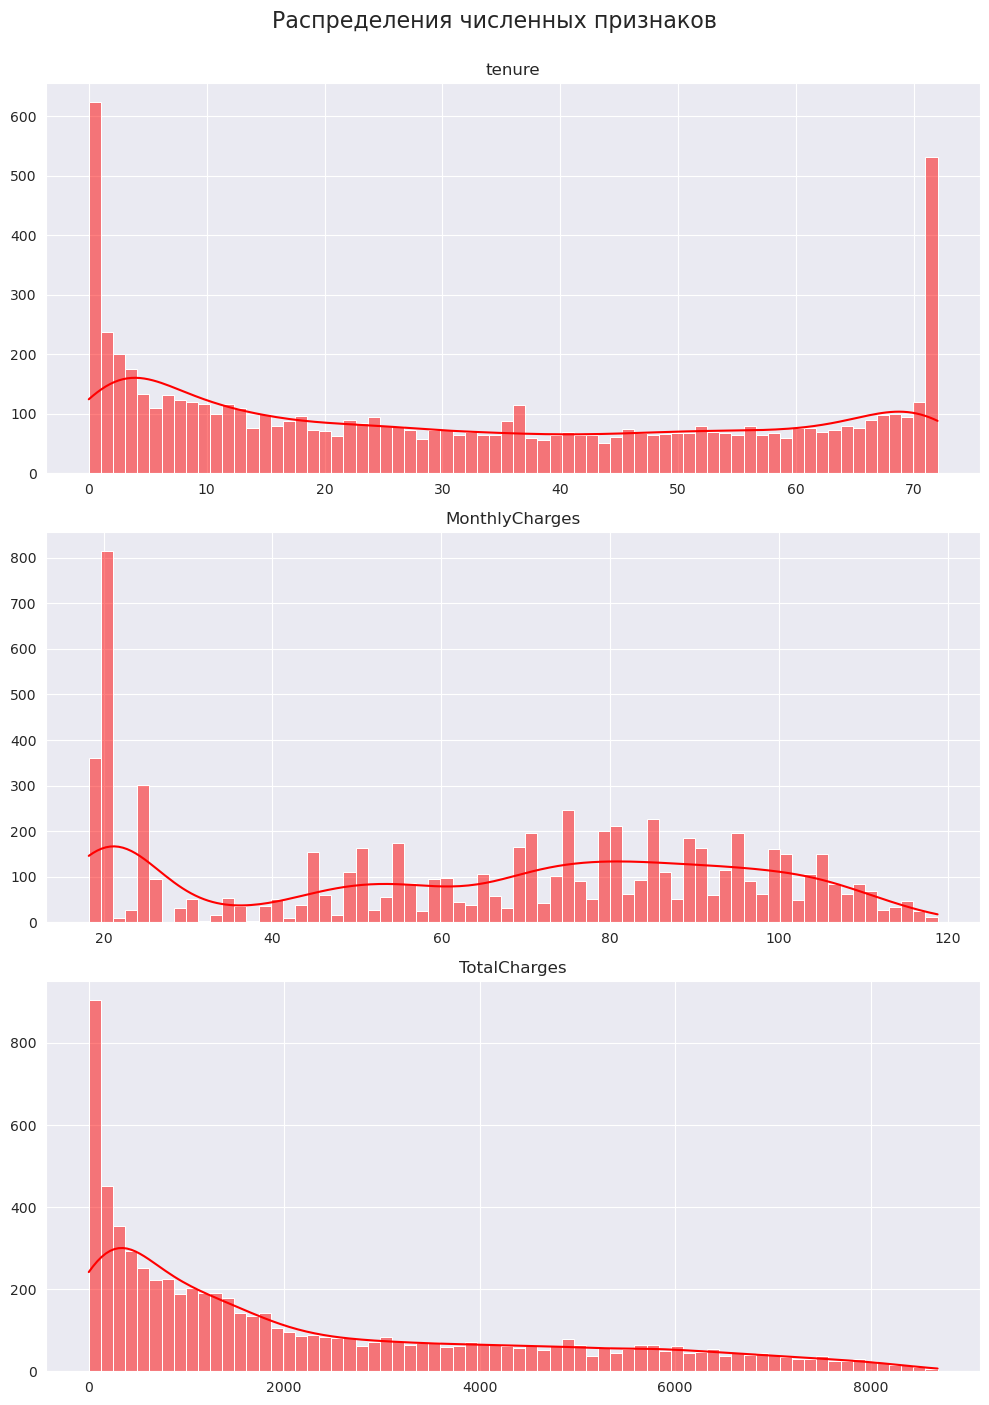

In [151]:
plt.figure(figsize=(10, 14))
for i, col in enumerate(numerical_columns):
  plt.subplot(len(numerical_columns), 1, i+1)
  sns.histplot(data=df, x=col, kde=True, bins=70, color='red')
  plt.xlabel(None)
  plt.ylabel(None)
  plt.title(col)

plt.subplots_adjust(hspace=0.6)
plt.suptitle('Распределения численных признаков', fontsize=16, y=1)
plt.tight_layout();

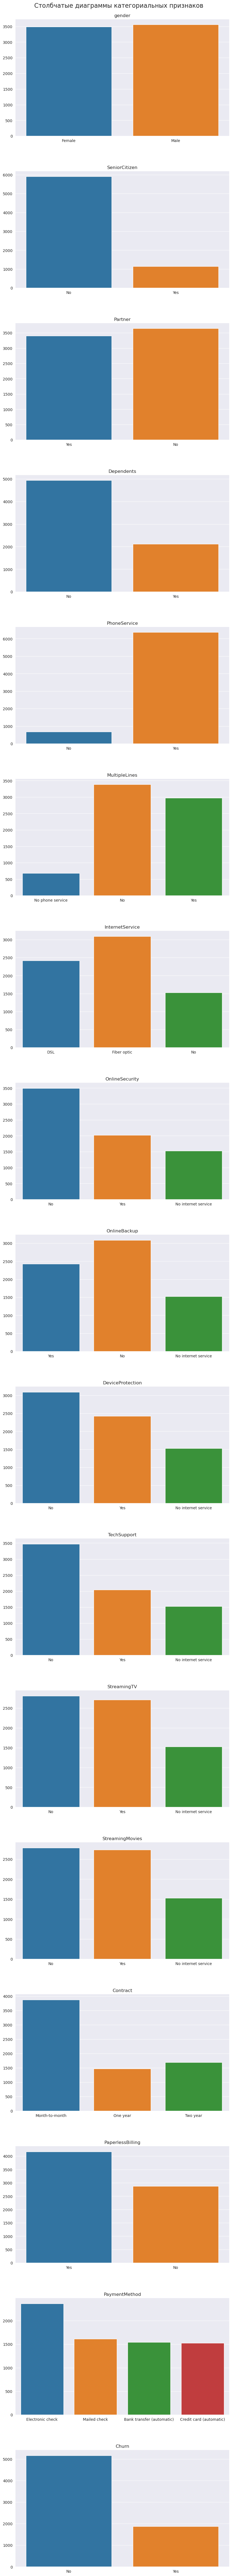

In [168]:
plt.figure(figsize=(10, 120))
for i, col in enumerate(categorical_columns):
  plt.subplot(len(categorical_columns), 1, i+1)
  sns.countplot(data=df, x=col, hue=col)
  plt.xlabel(None)
  plt.ylabel(None)
  plt.title(col)

plt.subplots_adjust(hspace=0.3)
plt.suptitle('Столбчатые диаграммы категориальных признаков', fontsize=16, y=0.885);

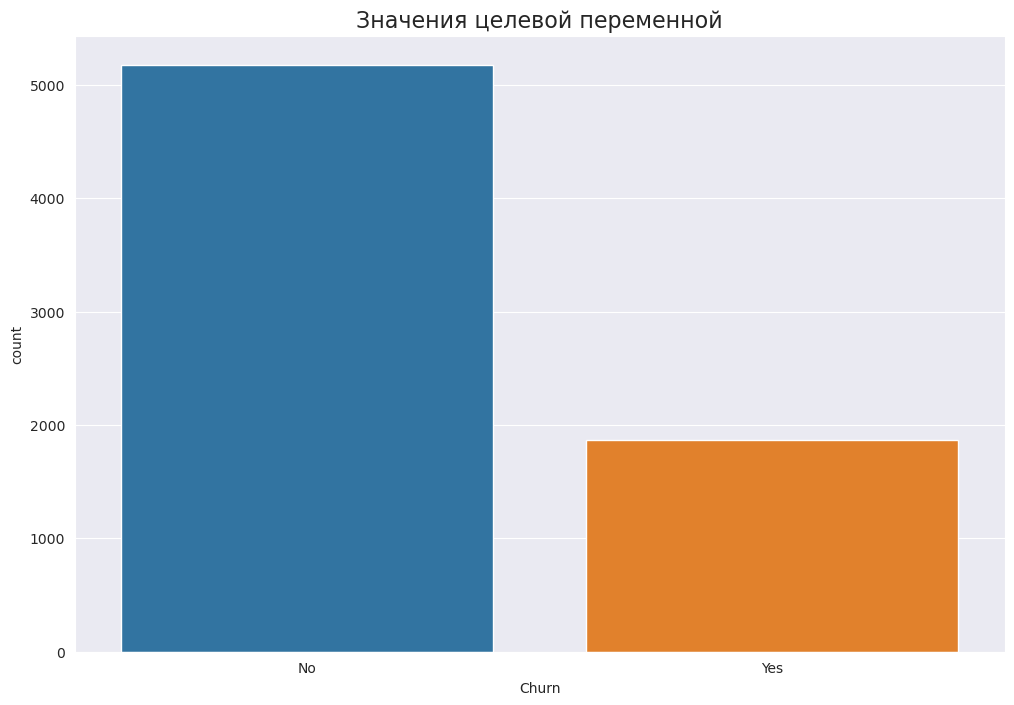

In [163]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Churn', hue='Churn')
plt.title('Значения целевой переменной', fontsize=16);